In [1]:
import math
import numpy as np
import pandas as pd
import scipy.io as sio
import scipy.stats as stats
import matplotlib.pyplot as plt
import scipy.sparse.linalg as ll
from sklearn.cluster import KMeans

In [2]:
#Part A
data = sio.loadmat('data.mat')['data'].T
print(data.shape)
labels = sio.loadmat('label.mat')['trueLabel'][0]
m = len(labels)
print(labels.shape)

(1990, 784)
(1990,)


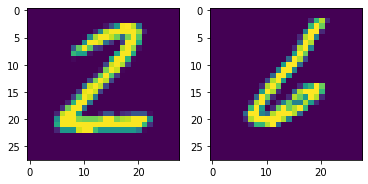

In [5]:
plt.subplot(1,2,1)
plt.imshow(data[29].reshape(28,28).T, interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(data[1987].reshape(28,28).T, interpolation='nearest')
plt.show()

In [6]:
# Part B
def speed(x,mu,r,cm):
    d = len(cm)
    L,U = ll.eigs(cm, k = 100)
    L = np.real(L)
    U = np.real(U).T
    Lt = np.diag(np.real(L[0:r]))
    Ut = np.real(U[0:r,:])
    mut = Ut @ mu
    datat = (Ut@data.T).T
    det = 1
    for i in range(r):
        det *= L[i]
    e = 0
    for i in range(r):
        e += ((datat[:,i]-mut[i])**2)/L[i]
    e = np.exp((-0.5)*e)
    N = (det)**(-0.5)*e
    return N

In [41]:
d = 784
m = 1990
k = 2
r = 30
its = 20
cm1 = np.identity(d)
cm2 = np.identity(d)
pi = np.random.rand(1,2)[0]
pi = pi/sum(pi)
pi1 = pi[0]
pi2 = pi[1]
mu1 = []
mu2 = []
for i in range(784):
    mu1.append(np.random.normal(0,1))
    mu2.append(np.random.normal(0,1))
mu1 = np.array(mu1)
mu2 = np.array(mu2)
loglik = []
acc = []

In [42]:
for rep in range(its):
    N1 = speed(data,mu1,r,cm1)
    N2 = speed(data,mu2,r,cm2)
    tau1 = pi1*N1 / (pi1*N1 + pi2*N2)
    tau2 = 1 - tau1

    pi1 = sum(tau1)/m
    pi2 = sum(tau2)/m
    mu1 = 0
    mu2 = 0
    for k in range(m):
        mu1 += tau1[k]*data[k]
        mu2 += tau2[k]*data[k]
    mu1 = mu1/sum(tau1)
    mu2 = mu2/sum(tau2)

    tau1 = np.reshape(tau1,(1990,1))
    tau2 = np.reshape(tau2,(1990,1))
    B = (data-mu1)
    Ba = (B*tau1)
    cm1 = B.T@Ba
    cm1 = cm1/sum(tau1)
    C = (data-mu2)
    Ca = (C*tau2)
    cm2 = Ca.T@Ca
    cm2 = cm2/sum(tau2)
    
    loglik.append(sum(np.log(pi1*N1 + pi2*N2)))

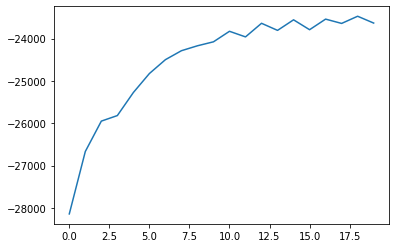

In [43]:
plt.figure()
plt.plot(loglik)
plt.show()

In [44]:
# Part C
print(pi1)
print(pi2)

0.5639912292061708
0.43600877079382905


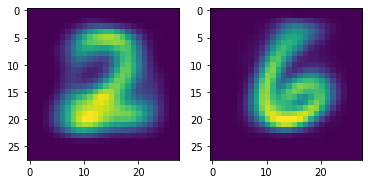

In [45]:
plt.subplot(1,2,1)
plt.imshow(mu1.reshape(28,28).T, interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(mu2.reshape(28,28).T, interpolation='nearest')
plt.show()

In [46]:
# Part D
pred = []
for j in range(m):
    if tau1[j]>0.5:
        pred.append(2)
    else:
        pred.append(6)
pred = np.array(pred)
acc = sum(pred == labels)/m
if acc < 0.5:
    for i in range(m):
        if pred[i]==2:
            pred[i]=6
        else:
            pred[i]=2
    acc = sum(pred == labels)/m

In [47]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
k_lab = []
for i in range(m):
    if kmeans.labels_[i] == 1:
        k_lab.append(2)
    else:
        k_lab.append(6)
k_acc = sum(pred == k_lab)/m

In [48]:
print("GMM-EM Accuracy: "+str(round(acc*100,2))+"%")
print("KMeans Accuracy: "+str(round(k_acc*100,2))+"%")

GMM-EM Accuracy: 89.15%
KMeans Accuracy: 85.93%
